<a href="https://colab.research.google.com/github/Karenpess/dsa/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de Negócio:

Prever o salário a partir do número de horas de estudos.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Carregando os dados

In [4]:
# carrega o dataset
df_dsa = pd.read_csv('/content/dataset.csv')

In [5]:
df_dsa.shape

(500, 2)

In [6]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [7]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [8]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Análise Exploratória com Resumo Estatístico

In [9]:
# verifica valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [10]:
# correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [11]:
# resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [12]:
# resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

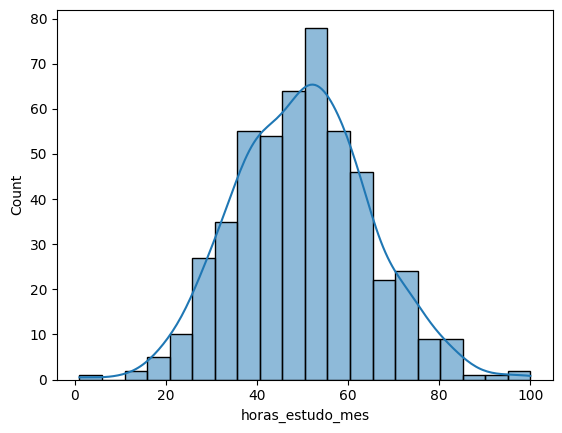

In [13]:
# histograma da variável preditora
sns.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True)

Preparação dos dados

In [14]:
# prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [15]:
type(X)

numpy.ndarray

In [16]:
# ajusta o hape de X
X = X.reshape(-1, 1)

In [17]:
# prepara a variável alvo
y = df_dsa['salario']

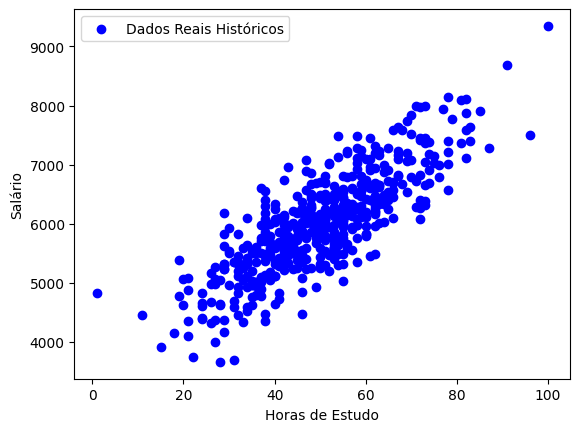

In [18]:
# gráfico de dispersão entre X e y
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [20]:
# divir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_treino.shape

(400, 1)

In [22]:
X_teste.shape

(100, 1)

In [23]:
y_treino.shape

(400,)

In [24]:
y_teste.shape

(100,)

Modelagem Preditiva (Machine Learning)

In [25]:
# cria o modelo de regressão linear simples
modelo = LinearRegression()

In [26]:
# treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

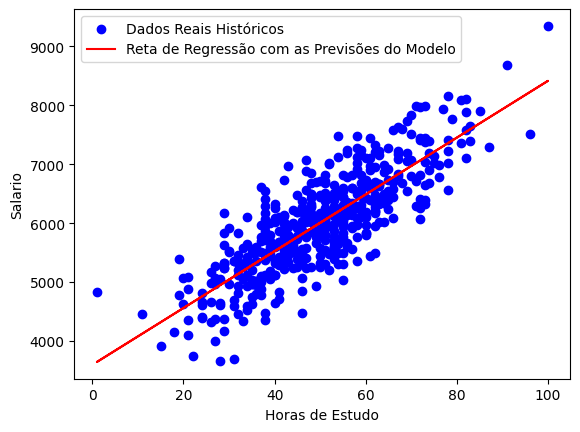

In [27]:
# visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Reta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salario')
plt.legend()
plt.show()

In [29]:
# avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:2f}')

Coeficiente R^2: 0.593933


In [31]:
# intercepto - parâmetro v0
modelo.intercept_

3596.7837243727545

In [32]:
# slope - parâmetro v1
modelo.coef_

array([48.18185277])

Deploy do Modelo

Usaremos o modelo para prever o saláraio com base nas horas de estudo.

In [34]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

In [35]:
# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

In [36]:
print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [37]:
# mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = v0 + v1 *
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [38]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [39]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
